<a href="https://colab.research.google.com/github/felicia2602/study_case_04/blob/main/StudyCase04_kelompokD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok D**
*   Anantawidya Prayoga (2006483523)
*   Felicia (2006463976)
*   Kesia Gabriele (2006464013)
*   Vito Waradana (2006482073)
*   Wildan Damar Adji (2006487326)
*   Yasmin Khairunnisa (2006571091)
*   Yemima Kathleen Monica (2006528982)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

file_ = 'data/Ashrae_Energy_Mean.csv'
try: #Loading Locally
    df = pd.read_csv(file_)
except Exception as err_:
    print(err_, " Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv
    df = pd.read_csv(file_)

print(df.shape)
df.head()

[Errno 2] No such file or directory: 'data/Ashrae_Energy_Mean.csv'  Trying to load data from GitHub.
--2022-11-18 09:16:40--  https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241207 (236K) [text/plain]
Saving to: ‘data/Ashrae_Energy_Mean.csv’

Ashrae_Energy_Mean. 100%[===================>] 235.55K  --.-KB/s    in 0.03s   

2022-11-18 09:16:40 (8.68 MB/s) - ‘data/Ashrae_Energy_Mean.csv’ saved [241207/241207]

(1413, 12)


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


# **Pre-Processing & Data Understanding**


sebelum digunakan, akan dilakukan pre-processing dan data understanding terlebih dahulu.

akan dicek unique dan NaN dari masing-masing kolom

In [3]:
df.primary_use.unique()

array(['Education', 'Lodging/residential', 'Office',
       'Entertainment/public assembly', 'Other', 'Retail', 'Parking',
       'Public services', 'Warehouse/storage', 'Food sales and service',
       'Religious worship', 'Healthcare', 'Utility', 'Technology/science',
       'Manufacturing/industrial', 'Services'], dtype=object)

In [4]:
df.square_feet.unique()

array([ 7432,  2720,  5376, ..., 11265, 29775, 92271])

In [5]:
df.year_built.unique()

array([2008., 2004., 1991., 2002., 1975., 2000., 1981., 1989., 2003.,
       2010., 1968., 1999., 2013., 1974., 1996., 1980., 1977., 1990.,
       1985., 2001., 1969., 2005., 2016., 2006., 2014., 1970., 1971.,
       2011., 1997., 2007., 1998., 2009., 1979., 1986., 1982., 1983.,
         nan, 1913., 1953., 1909., 1958., 1960., 1976., 1906., 1900.,
       1995., 1956., 1930., 1967., 1919., 1955., 1965., 1907., 2012.,
       1992., 1948., 1950., 1941., 1957., 1964., 1940., 1951., 1966.,
       1934., 1959., 1993., 1939., 1918., 1963., 1987., 1914., 1973.,
       1988., 1935., 1942., 2015., 1931., 1928., 1929., 1908., 1927.,
       1923., 1962., 1944., 1910., 1949., 2017., 1922., 1911., 1932.,
       1978., 1912., 1916., 1924., 1926., 1904., 1984., 1903., 1925.,
       1961., 1921., 1972., 1936., 1954., 1905., 1920., 1917., 1952.,
       1994., 1933., 1945., 1915., 1947., 1946., 1902., 1937.])

In [ ]:
df.floor_count.unique()

array([nan,  5.,  4., 10.,  6.,  8.,  7.,  9., 13., 16., 11., 12.,  2.,
        3.,  1., 14., 21., 26., 19.])

In [ ]:
df.air_temperature.unique()

array([22.74481579, 12.01550697, 24.96370238, 15.50251797, 14.72536218,
       11.05862891, 15.20424406,  7.57213642, 21.32526143, 11.70435446,
        9.95909196,  9.11562797, 13.10965386,  9.07913823])

In [ ]:
df.cloud_coverage.unique()

array([2.99872748, 0.05926623, 2.08371163, 4.07923534, 1.84457582,
       0.38835402, 0.68108879,        nan, 0.59239634, 0.33895771,
       5.67178518, 2.77878719, 0.66583213, 1.0921006 ])

In [ ]:
df.dew_temperature.unique()

array([17.37932778,  7.57810735,  3.90181369,  8.28569309,  9.83439948,
        8.35309506,  7.68414281,  2.03795245, 13.84808525, -0.30467529,
        6.69340862,  2.83697859,  6.4789768 ,  4.51282321])

In [ ]:
df.precip_depth_1_hr.unique()

array([ 1.2405892 ,         nan,  0.15532499,  0.89597955,  0.44020243,
        1.0294947 , 11.67563291,  0.7756863 ,  0.35349139,  0.80887094,
        1.03321485,  3.38183677])

In [ ]:
df.sea_level_pressure.unique()

array([1017.94943651, 1015.75713184, 1011.43656295, 1018.05206304,
       1016.79749492,           nan, 1017.56146101, 1015.59679357,
       1016.40457937, 1015.50807328, 1014.01735327, 1016.42698822,
       1016.60850104, 1017.19211059])

In [ ]:
df.wind_direction.unique()

array([152.52101497, 197.76937255, 153.62943024, 184.29592152,
       205.51288957, 206.60613526, 129.10686864, 206.99503712,
       123.38870069, 182.09660426, 207.13407607, 187.30110422,
       184.70213516, 186.64878713])

In [ ]:
df.wind_speed.unique()

array([3.39147213, 4.01377735, 2.89979459, 3.90543276, 3.78864215,
       4.84647199, 2.2371927 , 3.39068964, 2.15710316, 3.10117029,
       5.4939387 , 4.1123769 , 3.10091075, 3.61954714])

akan dilakukan 'drop' pada kolom-kolom yang kiranya tidak memberikan pengaruh signifikan terhadap meter reading.

In [6]:
#drop yearbuilt (data tidak signifikan berdasarkan heatmap) dan floorcount (karena terlalu banyak NaN)

df.drop(['year_built', 'floor_count'], axis = 1, inplace = True)
df

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
...,...,...,...,...,...,...,...,...,...,...
1408,7.484137,Entertainment/public assembly,19619,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1409,4.732815,Education,4298,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1410,7.211347,Entertainment/public assembly,11265,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1411,187.117994,Lodging/residential,29775,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


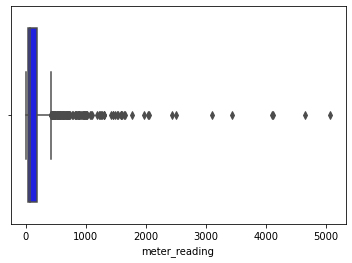

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


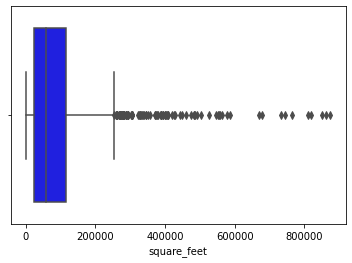

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


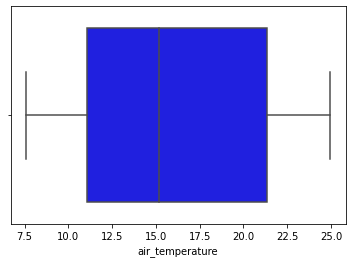

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


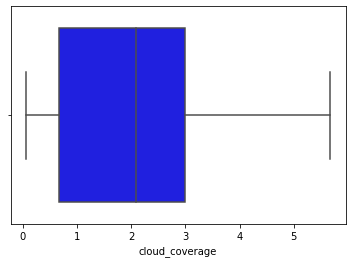

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


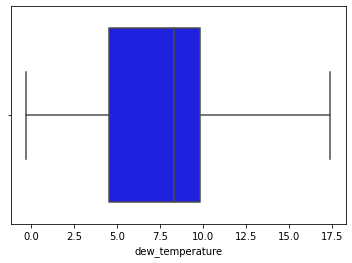

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


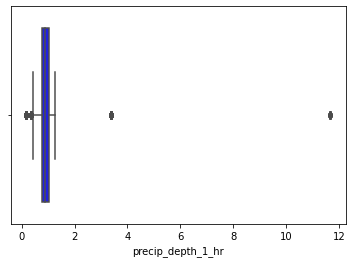

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


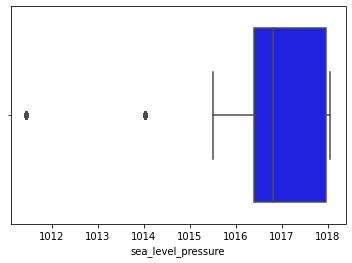

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


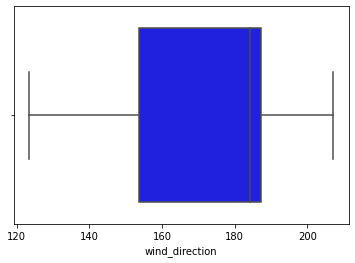

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


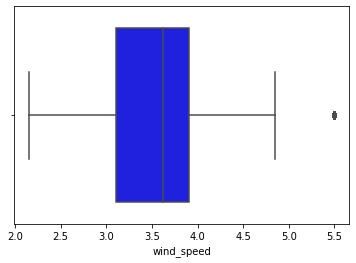

In [7]:
cat_var = df.select_dtypes(include=['object']).columns.tolist()
num_var = df.select_dtypes(exclude=['object']).columns.tolist()

for i in range(len(num_var)):
    sns.boxplot(df[num_var[i]], color = "blue", orient = "h")
    plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   air_temperature     1413 non-null   float64
 4   cloud_coverage      1396 non-null   float64
 5   dew_temperature     1413 non-null   float64
 6   precip_depth_1_hr   1237 non-null   float64
 7   sea_level_pressure  1324 non-null   float64
 8   wind_direction      1413 non-null   float64
 9   wind_speed          1413 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 110.5+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


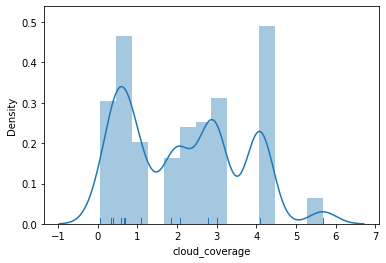

In [9]:
sns.distplot(df['cloud_coverage'], kde=True, rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


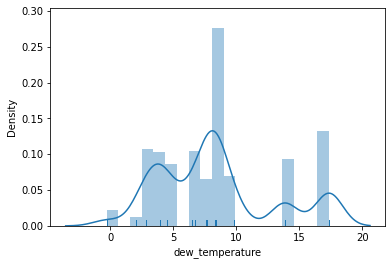

In [10]:
sns.distplot(df['dew_temperature'], kde=True, rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


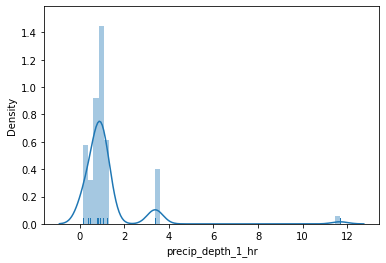

In [12]:
sns.distplot(df['precip_depth_1_hr'], kde=True, rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


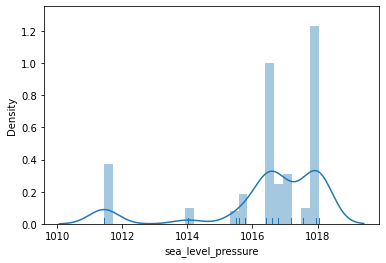

In [14]:
sns.distplot(df['sea_level_pressure'], kde=True, rug=True)

dari grafik diatas, dapat dilihat bahwa plot cloud coverage dan dew temperature tidak memiliki kecenderungan skew ke kanan ataupun ke kiri, sehingga pengisian nilai NaN dapat dilakukan menggunakan mean. sedangkan precip depth 1 hr dan sea level pressure memiliki kecenderungan skew sehingga digunakan median.

In [15]:
df['cloud_coverage'] = df['cloud_coverage'].fillna(df['cloud_coverage'].mean())
df['dew_temperature'] = df['dew_temperature'].fillna(df['dew_temperature'].mean())
df['precip_depth_1_hr'] = df['precip_depth_1_hr'].fillna(df['precip_depth_1_hr'].median())
df['sea_level_pressure'] = df['sea_level_pressure'].fillna(df['sea_level_pressure'].median())

# **EDA (data visualisasi)**

In [16]:
print(df.corr())

                    meter_reading  square_feet  air_temperature  \
meter_reading            1.000000     0.583356        -0.034220   
square_feet              0.583356     1.000000        -0.022617   
air_temperature         -0.034220    -0.022617         1.000000   
cloud_coverage           0.013167    -0.043972         0.095199   
dew_temperature         -0.017421    -0.076130         0.569026   
precip_depth_1_hr        0.389051     0.139779        -0.358352   
sea_level_pressure      -0.009158    -0.076230        -0.312447   
wind_direction          -0.001357    -0.075351        -0.756898   
wind_speed              -0.073006    -0.125481        -0.600079   

                    cloud_coverage  dew_temperature  precip_depth_1_hr  \
meter_reading             0.013167        -0.017421           0.389051   
square_feet              -0.043972        -0.076130           0.139779   
air_temperature           0.095199         0.569026          -0.358352   
cloud_coverage            1.00000

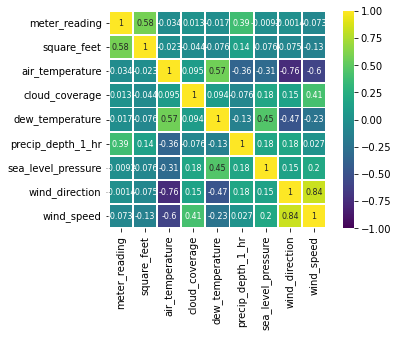

In [17]:
sns.heatmap(df.corr(),cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=1,annot=True,
annot_kws={"size": 8}, square=True)

Berdasarkan matriks korelasi diatas, 

- 3 pasangan variabel yang memiliki korelasi positif tinggi ialah wind_direction dengan wind_speed (0.84) ; meter_reading dengan square_feet (0.58) ; dew_temperature dengan air_temperature (0.57).
-  3 pasangan variabel yang memiliki korelasi negatif tinggi ialah air_temperature dengan wind_direction (-0.76) ; air_temperature dengan wind_speed (-0.6) dew_temperature dengan wind_direction (-0.47).
- Variabel lainnya memiliki nilai korelasi linear yang cenderung rendah (kurang signifikan).

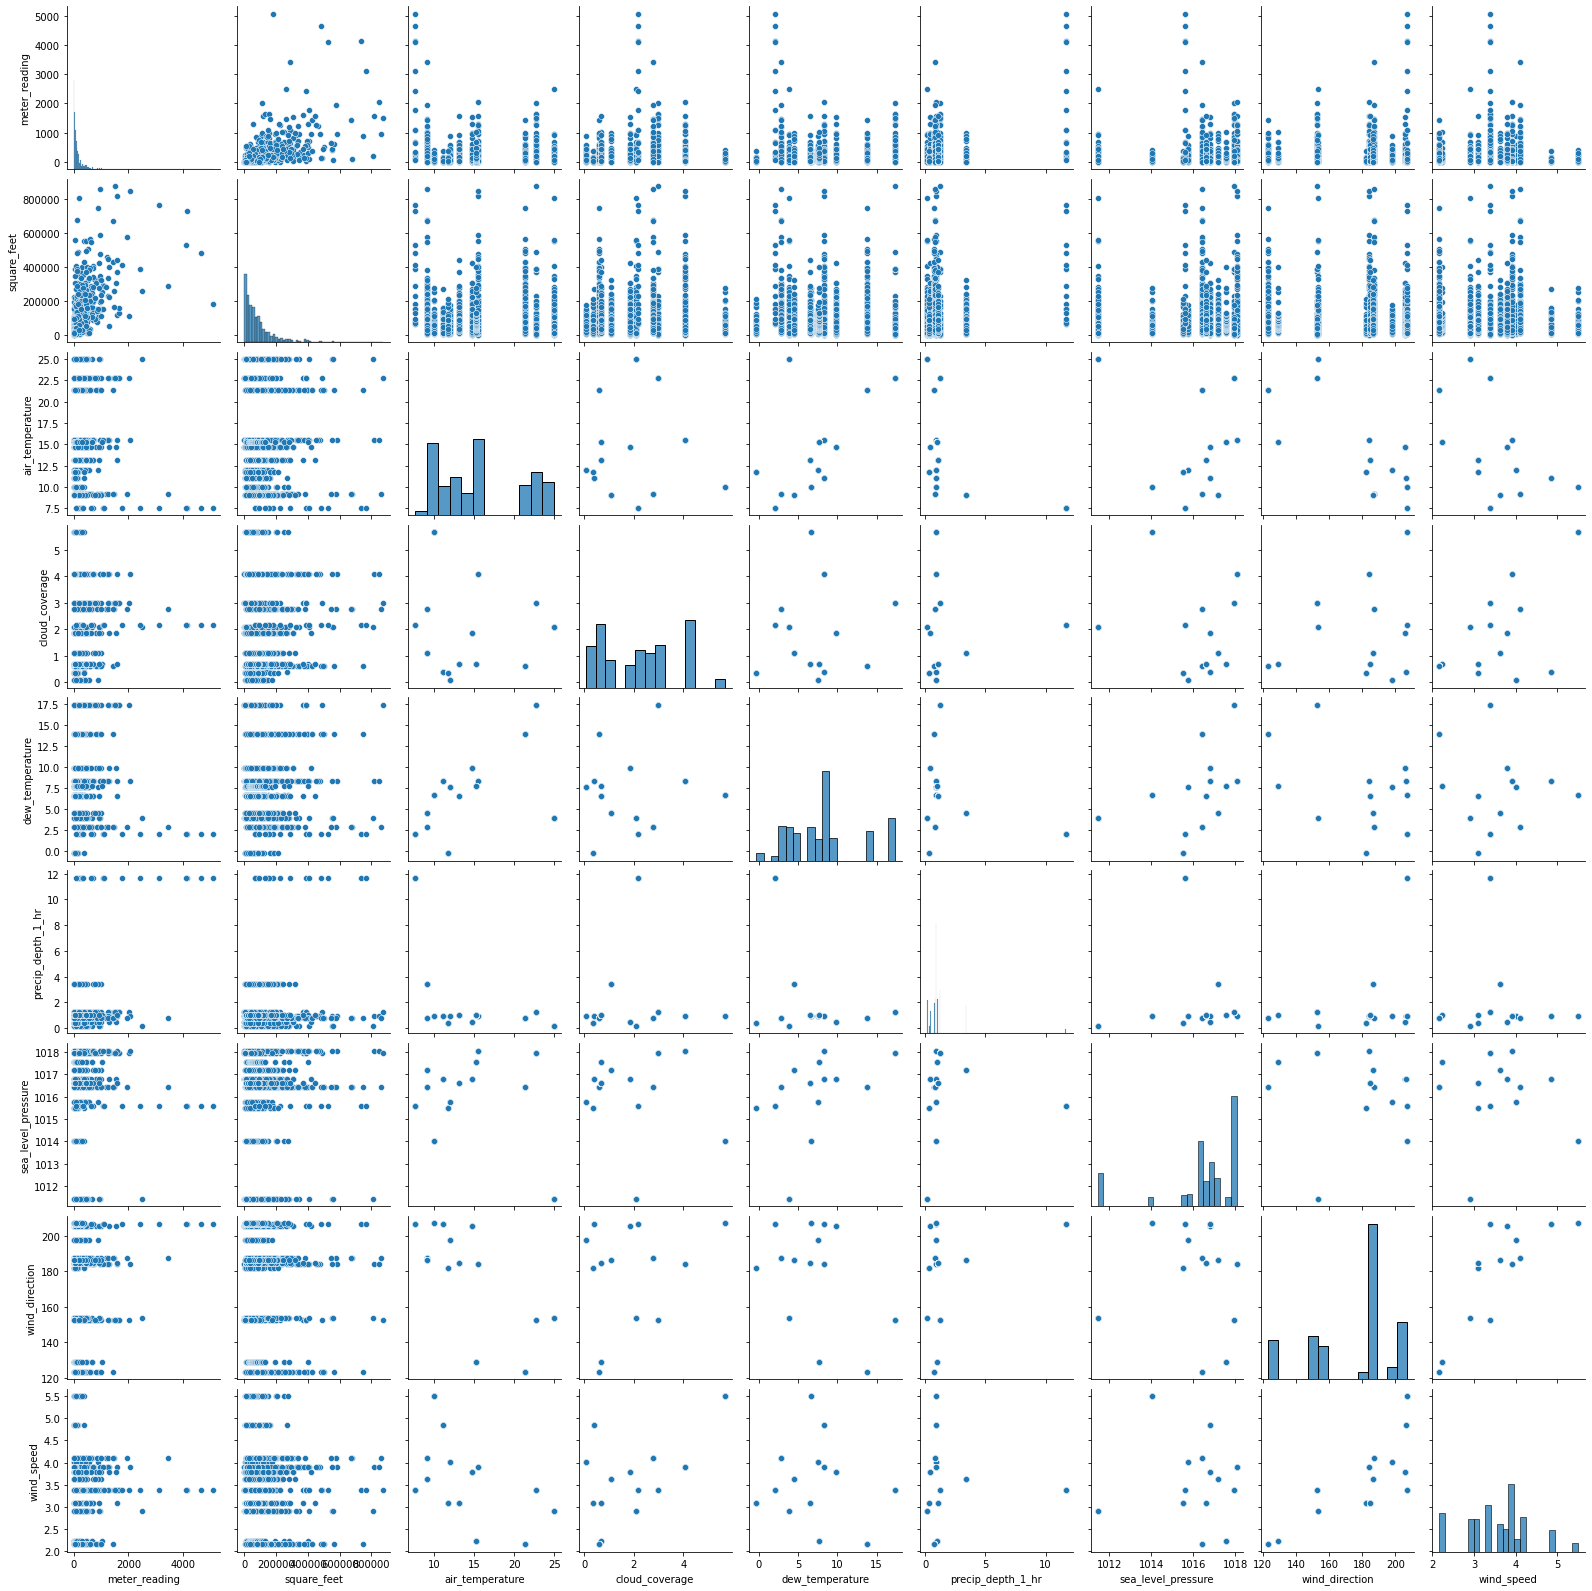

In [18]:
sns.pairplot(df)

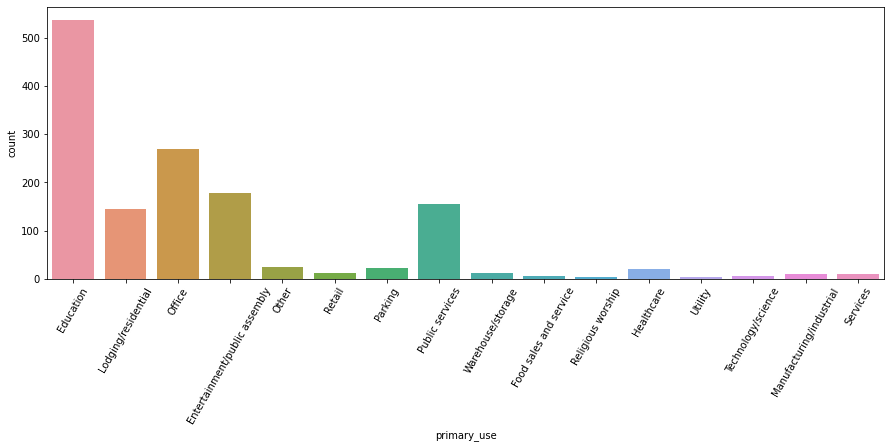

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='primary_use',data=df)
plt.xticks(rotation=60)
plt.show()

Berdasarkan grafik di atas, dari record yang tersimpan, terlihat bahwa bangunan paling banyak digunakan sebagai tempat edukasi (Education), yaitu sebanyak 537. Diikuti dengan 3 kategori lainnya yaitu Office, Entertaiment/Public assembly, dan Public Services. Sementara yang paling sedikit digunakan sebagai tempat ibadah (Religious Worship).

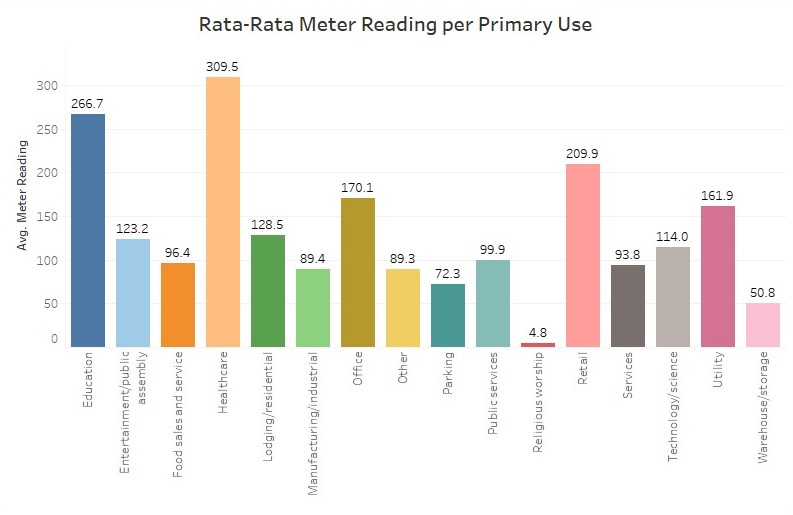

Berdasarkan output grafik di atas dapat terlihat bahwa penggunaan energi terbanyak adalah pada bangunan yang digunakan sebagai healthcare sebesar 309,5 diikuti banguan yang dipakai sebagai tempat edukasi sebesar 266,7 sedangkan bangunan yang menggunakan energi paling sedikit adalah pada bangunan yang digunakan sebagai tempat religious worship yaitu sebesar 4,8. Bangunan healthcare memiliki meter_reading tertinggi karena peralatan-peralatan yang digunakan di bangunan tersebut menghabiskan banyak listrik selain itu juga bangunan yang digunakan untuk healthcare lebih banyak beroperasi sehingga memakan energi yang lebih banyak, sedangkan banguan Religious memiliki meter_reading terendah karena di bangunan-bangunan tersebut biasanya tidak terlalu menggunakan peralatan elektronik yang menghabiskan banyak energi dan tidak terlalu sering digunakan sehingga sedikit memakan energi.

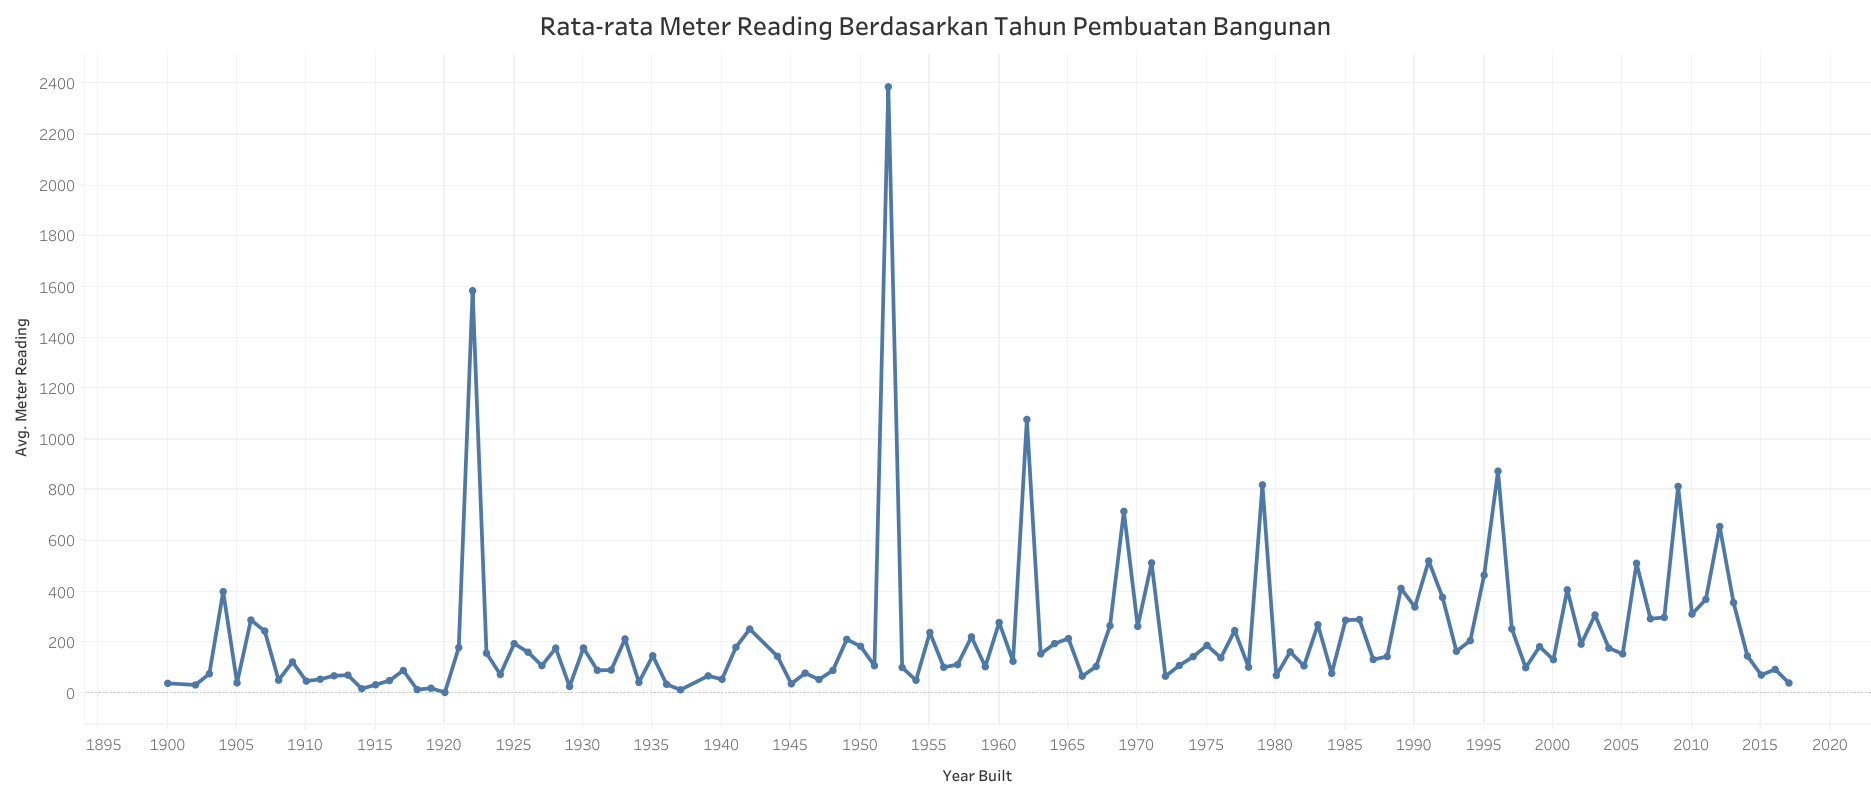

Terlihat dari output grafik diatas bahwa pengeluaran energi terbanyak pada bangunan ada diantara tahun 1950 dan 1955 sebesar 2.400 diikuti pengeluaran energi terbesar kedua ada diantara tahun 1920 dan 1925. Sedangkan untuk rata-rata pengeluaran energi terendah terdapat di bangunan yang dibangun antara tahun 1910 dan 1915 dikuti oleh yang dibangun antara tahun 1915 dan 1920.

# **Korelasi & Regresi**

In [20]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats

#pembuatan model statistik dengan seluruh variabel
m = ols('meter_reading ~ square_feet + air_temperature + cloud_coverage + dew_temperature + precip_depth_1_hr + sea_level_pressure + wind_direction + wind_speed', df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     146.9
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          2.31e-179
Time:                        09:22:06   Log-Likelihood:                -9949.2
No. Observations:                1413   AIC:                         1.992e+04
Df Residuals:                    1404   BIC:                         1.996e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.398e+04   9430

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


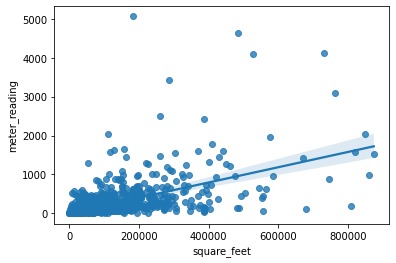

In [21]:
p = sns.regplot(df.square_feet, df.meter_reading)
p

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


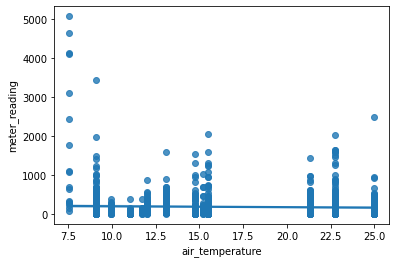

In [22]:
p = sns.regplot(df.air_temperature, df.meter_reading)
p

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


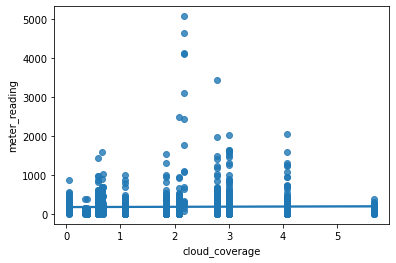

In [23]:
p = sns.regplot(df.cloud_coverage, df.meter_reading)
p

In [24]:
#Variable Selection: Stepwise di Analisis Regresi
def forward_selected(data, response):
    """Linear model designed by forward selection.
    https://planspace.org/20150423-forward_selection_with_statsmodels/
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

## Model Asumsi

In [25]:
model = forward_selected(df, 'meter_reading')

print(model.model.formula)
print(model.rsquared_adj)

meter_reading ~ square_feet + precip_depth_1_hr + primary_use + air_temperature + wind_direction + cloud_coverage + dew_temperature + wind_speed + 1
0.4861701561255959


In [26]:
# Interpretasi koefisien
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     61.73
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          1.32e-187
Time:                        09:22:09   Log-Likelihood:                -9897.3
No. Observations:                1413   AIC:                         1.984e+04
Df Residuals:                    1390   BIC:                         1.996e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

Dari model diatas, didapatkan hasil sebagai berikut: 

- Data signikan secara statistik karena memiliki nilai p-value < 0.05. 
- Nilai $R^2$ adalah 0.456, dalam artian lain model hanya menjelaskan 45.6% variansi dari data, sehingga dapat disimpulkan model ini tidak terlalu akurat untuk digunakan.

Coef menunjukkan seberapa banyak kenaikan 1 unit pada variabel bebas terhadap variabel terikat. Sehingga didapatkan informasi sebagai berikut:
- setiap kenaikan 1 unit square_feet akan meningkatkan 0.0018 meter reading
- setiap kenaikan 1 unit air_temperature akan menaikkan 5.6441 meter reading
- setiap kenaikan 1 unit cloud_coverage akan menaikkan 19.8051 meter reading
- setiap kenaikan 1 unit dew_temperature akan menaikkan 8.7044 meter reading
- setiap kenaikan 1 unit precip_depth_1_hr akan menaikkan 93.1325 meter reading
- setiap kenaikan 1 unit sea_level_pressure akan menurunkan 14.3148 meter reading
- setiap kenaikan 1 unit wind_direction akan menaikkan 2.7235 meter reading
- setiap kenaikan  1 unit wind_speed akan menurunkan 56.2047 meter reading. 

# **Kesimpulan**



*   Berdasarkan hasil analisis regresi yang telah kelompok kami lakukan, dapat disimpulkan bahwa model yang telah kami asumsikan menghasilkan interpretasi yang bisa dibilang kurang akurat dikarenakan nilai R-squared yg cukup kecil yaitu 0.456.
*   dari output grafik 'rata-rata meter reading berdasarkan tahun pembuatan bangunan' didapatkan informasi bahwa pengeluaran energi terbanyak pada bangunan ada diantara tahun 1950 dan 1955  dan rata-rata pengeluaran energi terendah terdapat di bangunan yang dibangun antara tahun 1910 dan 1915.
* dari data yang diberikan perusahaan, diketahui bangunan paling banyak digunakan sebagai tempat edukasi (Education) dan penggunaan energi terbanyak adalah pada bangunan yang digunakan sebagai healthcare.



# **Rekomendasi**



*   Untuk perusahaan yang bersangkutan, dapat diperhatikan lagi dalam proses pengambilan datanya, hal tersebut dikarenakan kelompok kami menemukan banyaknya missing value didalam data yang diberikan, terutama pada bagian floor count sehingga kolom tersebut terpaksa tidak digunakan karena terlalu banyaknya data yang hilang.
*   Untuk meningkatkan efisiensi energi, berdasarkan hasil regresi di atas sebuah bangunan harus memiliki luas seminimal mungkin yang sesuai dengan kegunaannya. Selain itu sebuah bangunan juga harus memiliki nilai precip_depth_1_hr, air_temperature, wind_direction, cloud_coverage, dew_temperature yang seminimal mungkin juga. Yang terakhir, untuk memaksimalkan efisiensi energi, wind_speed pada sebuah bangunan harus bernilai tinggi.
* Untuk setiap bangunan yang memiliki luas bangunan yang besar, memerlukan daya listrik yang cukup besar juga karena terdapat korelasi positif yang besar antara keduanya. Terutama untuk bangunan sebagai tempat Education, Healthcare, dan Retail yang memiliki konsumsi listrik yang besar (alasan juga diperkuat oleh hasil parameter regresi).